<a href="https://colab.research.google.com/github/Mr-Pacheco/DataScience/blob/main/P3_Mec%C3%A2ncia_dos_Fl%C3%BAidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova 3 de Mecânica dos Flúidos 2
# Alunos: Murilo Pacheco Magalhães, Renan Gomes Diniz, Pedro Renato Souza, Osmar Cândido Diniz



## **1 - Considere o bocal convergente divergente da Figura 01. Na entrada, considerar como hipóteses simplificadoras pressão de 4,8 MPa, temperatura de 1900 K e baixas velocidades. Na saída, considerar a pressão atmosférica a uma altitude de 1500 metros. Como fluido de trabalho, considerar as propriedades do CO2.**

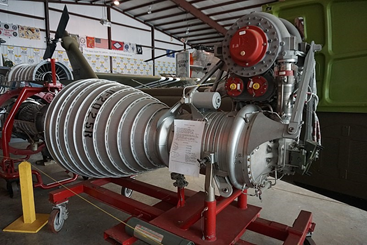

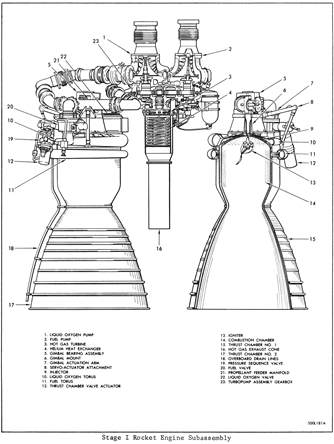

### **A - Calcular a variação das grandezas temperatura, velocidade, densidade,área, velocidade do som e Número de Mach ao longo do bocal. Normalizar e adimensionalizar estas variáveis e apresentá-las graficamente, em função da queda de pressão, como ilustrado na Figura 02.**

#### Obs: Para a realização deste exercício foi utilizado como base o livro de Mecância dos Flúidos, Çengel. Especificamente o capítulo 12.

* Utilizando o Exemplo 12-3 do Çengel edição 1 como referência
* Utilizando as tabelas do Çengel edição 1

#### Informações fornecidas: 
* Pressão de entrada = 4,8 Mpa
* Temperatura de entrade = 1900 K
* Pressão de saída = considerar a pressão atmosférica a uma altitude de 1500 metros.
* Como fluido de trabalho, considerar as propriedades do CO2.
* Velocidade baixa


In [ ]:
# P = Pressão de saída = considerar a pressão atmosférica a uma altitude de 1500 metros.
# usando como referência https://pt.wikibooks.org/wiki/Curso_de_termodin%C3%A2mica/Tabelas:_press%C3%A3o_do_ar e 
# https://edisciplinas.usp.br/pluginfile.php/4673077/mod_resource/content/2/Pressao%20atmosf%C3%A9rica.pdf
# Pressão a 1500 metros de altitude =	632 mmhg
# 1 mmhg = 133 pa
P = (632 * 133) / 1000 # Kpa
"Pressão final da saída = {} Kpa".format(P)

'Pressão final da saída = 84.056 Kpa'

##### Obs: 
* como todos os exercicios são em relação a queda da pressão, criarei um dicionário com as chaves sendo as pressões que serão utilizadas e os valores sendo os resultados das variáveis pedidas no exercício


In [ ]:
import math
import matplotlib.pyplot as plt

#### Considerações:
* Considerando a pressão inicial = 4800 kpa
* Pressão final = 84 kpa 
* A pressão sofrerá uma queda de 4800 kpa para 84 kpa

In [ ]:
P = {}
# Pressão inicial = 4800, Pressão Final 84, indo de -18 a -18
# Não inclui o 83
for i in range(4800, 83, -18):
  P[i] = i

#### Cálculo da temperatura

##### Formúla T = To(P/Po)^((k-1)/k)

To = temperatura de entrada
To = 1900 K

 P = Pressão de saída = considerar a pressão atmosférica a uma altitude de 1500 metros.

Usando como referência https://pt.wikibooks.org/wiki/Curso_de_termodin%C3%A2mica/Tabelas:_press%C3%A3o_do_ar e 
 https://edisciplinas.usp.br/pluginfile.php/4673077/mod_resource/content/2/Pressao%20atmosf%C3%A9rica.pdf

Pressão a 1500 metros de altitude =	632 mmhg

1 mmhg = 133 pa

P = (632 * 133) / 1000 (Kpa)

P = 84 Kpa

Po = pressão de entrada
Po = 4800 (Kpa)

K = A razão especifica do flúido, no caso o CO2

Usando de referência o exemplo 12-2, 12-3 e http://www.gamagases.com.br/propriedades-dos-gases-dioxido-de-carbono.html#:~:text=75%2C13%20psia.,e%2020%C2%BAC%2C%20Cp%2FCv.

K = 1.316 # gás a 101,325 kPa e 20ºC, Cp/Cv.

In [ ]:
# Formúla T = To(P/Po)^(k-1/k)
To = 1900 # K
Po = 4800 # Kpa
K = 1.316 # gás a 101,325 kPa e 20ºC, Cp/Cv.

for key, value in P.items():
  T = To * (key/Po)**((K-1)/K)
  P[key] = ["Temperatura = {}".format(round(T,2))]

In [ ]:
P[4782]

['Temperatura = 1898.29']

#### Cálculo Velocidade
* Formúla V = sqrt(2 * Cp * (To - T))
* Ampliando a formúla V = sqrt(2 * Cp * (To - (To(P/Po)**((K-1)/K))))
* Cp = calor específico a pressão constante
* De acoro com a tabela A-10 e o exemplo 12-3 do livro do Çengel
* Para pressão = 1 atm e 25ºC

In [ ]:
Cp = 0.838 # (Kj/K * K)
for key, value in P.items():
   Velocidade = math.sqrt(2 * Cp * (To - (To * (key/Po)**( (K-1) /K) ) ) * 1000)
   P[key] = P.get(key, []) + ["Velocidade = {}".format(round(Velocidade, 2))]

In [ ]:
P[4782]

['Temperatura = 1898.29', 'Velocidade = 53.59']

#### Cálculo da Densidade


* Formúla rho = P/(R * T)
* Ampliando a fórmula rho = P / (R *(To*(P/Po)**((K-1)/K)))
* R = A constante de gás do CO2
* R = 0.1889, De acordo com a Tabela A-1 e exemplo 12-3 do livro do Çengel 

In [ ]:
R = 0.1889 # Kj/Kg * K
for key, value in P.items():
   Densidade = key / (R * (To * (key / Po)**((K-1)/K)))
   P[key] = P.get(key, []) + ["Densidade = {}".format(round(Densidade, 2))]

In [ ]:
P[4782]

['Temperatura = 1898.29', 'Velocidade = 53.59', 'Densidade = 13.34']

#### Cálculo Área

* Formúla A = m / Rho * V
* Ampliando a fórmula A = m / (P / (R * (To * (P/Po)^((K-1)/K))) * sqrt(2 * Cp * (To - (To * (P/Po)^((K-1)/K)))))
* m = vazão mássica
* Considerando m = 3 kg/s, tendo como base o exemplo 12-3 do livro o Çengel

In [ ]:
m = 3 # kg/s
# Área em metros quadrados
for key, value in P.items():
  try:
    Area = m / ((key / (R * (To*(key/Po)**((K-1)/K)))) * math.sqrt(2 * Cp * (To - (To * (key/Po)**( (K-1) /K) ) ) * 1000))
    P[key] = P.get(key, []) + ["Área = {}".format(round(Area, 5))]
  except:
    A = 0
    P[key] = P.get(key, []) + ["Área = {}".format("Não Existe")]

In [ ]:
P[4782]

['Temperatura = 1898.29',
 'Velocidade = 53.59',
 'Densidade = 13.34',
 'Área = 0.0042']

#### Velocidade do Som

* Velocidade do Som = c
* Fórmula c = sqrt(k * R * T)
* Ampliando a fórmula c = sqrt(k * R * (To*(P/Po)**((K-1)/K)))
* k = 1.316 -> A razão especifica do flúido, no caso o CO2
* R = 0.1889 -> A constante de gás do CO2

In [ ]:
# Velocidade em m/s
for key, value in P.items():
  c = math.sqrt(K * R * (To * (key/Po)**((K-1)/K)))
  P[key] = P.get(key, []) + ["Velocidade do Som = {}".format(round(c, 2))]

In [ ]:
P[4782]

['Temperatura = 1898.29',
 'Velocidade = 53.59',
 'Densidade = 13.34',
 'Área = 0.0042',
 'Velocidade do Som = 21.72']

#### Número de Mach
* Fórmula Ma = V / c
* V = velocidade = sqrt(2 * Cp * (To - (To(P/Po)**((K-1)/K))))
* c = velocidade do som = sqrt(k * R * (To*(P/Po)**((K-1)/K)))

In [ ]:
# Admensional
for key, value in P.items():
  Ma = math.sqrt(2 * Cp * (To - (To * (key/Po)**((K-1)/K)))) / math.sqrt(K * R * (To * (key/Po)**((K-1)/K)))
  P[key] = P.get(key, []) + ["Número de Mach = {}".format(round(Ma, 3))]

In [ ]:
P[4782]

['Temperatura = 1898.29',
 'Velocidade = 53.59',
 'Densidade = 13.34',
 'Área = 0.0042',
 'Velocidade do Som = 21.72',
 'Número de Mach = 0.078']

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(P.values(), index = P.keys(), columns = ['Temperatura(K)', 'Velocidade(m/s)', 'Densidade(kg/m^3)', "Área(m^2)", "Velocidade do Som(m/s)", "Número de Mach"])

In [ ]:
df['Pressão'] = P.keys()
df.head()

,Temperatura(K),Velocidade(m/s),Densidade(kg/m^3),Área(m^2),Velocidade do Som(m/s),Número de Mach,Pressão
4800,Temperatura = 1900.0,Velocidade = 0.0,Densidade = 13.37,Área = Não Existe,Velocidade do Som = 21.73,Número de Mach = 0.0,4800
4782,Temperatura = 1898.29,Velocidade = 53.59,Densidade = 13.34,Área = 0.0042,Velocidade do Som = 21.72,Número de Mach = 0.078,4782
4764,Temperatura = 1896.57,Velocidade = 75.84,Densidade = 13.3,Área = 0.00297,Velocidade do Som = 21.71,Número de Mach = 0.11,4764
4746,Temperatura = 1894.85,Velocidade = 92.95,Densidade = 13.26,Área = 0.00243,Velocidade do Som = 21.7,Número de Mach = 0.135,4746
4728,Temperatura = 1893.12,Velocidade = 107.4,Densidade = 13.22,Área = 0.00211,Velocidade do Som = 21.69,Número de Mach = 0.157,4728


In [ ]:
df['Temperatura(K)'] = df['Temperatura(K)'].str.replace('Temperatura = ', '').astype(float)
df['Velocidade(m/s)'] = df['Velocidade(m/s)'].str.replace('Velocidade = ','').astype(float)

In [ ]:
df['Densidade(kg/m^3)'] = df['Densidade(kg/m^3)'].str.replace('Densidade = ','')
df['Área(m^2)'] = df['Área(m^2)'].str.replace('Área = ','')
df['Velocidade do Som(m/s)'] = df['Velocidade do Som(m/s)'].str.replace('Velocidade do Som = ','').astype(float)
df['Número de Mach'] = df['Número de Mach'].str.replace('Número de Mach = ','').astype(float)

In [34]:
df

,Temperatura(K),Velocidade(m/s),Densidade(kg/m^3),Área(m^2),Velocidade do Som(m/s),Número de Mach,Pressão
4800,1900.00,0.00,13.37,Não Existe,21.73,0.000,4800
4782,1898.29,53.59,13.34,0.0042,21.72,0.078,4782
4764,1896.57,75.84,13.3,0.00297,21.71,0.110,4764
4746,1894.85,92.95,13.26,0.00243,21.70,0.135,4746
4728,1893.12,107.40,13.22,0.00211,21.69,0.157,4728
...,...,...,...,...,...,...,...
156,834.50,1336.33,0.99,0.00227,14.40,2.934,156
138,810.29,1351.43,0.9,0.00246,14.19,3.011,138
120,783.55,1367.91,0.81,0.00271,13.96,3.099,120
102,753.56,1386.16,0.72,0.00302,13.69,3.203,102


In [ ]:
df.to_csv('P3_MecFlu.csv', sep='\t', encoding='utf-8', index = False)